# BINARY CLASSIFICATION OF SENTIMENT

**File:** BinaryClassification.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# INSTALL AND IMPORT LIBRARIES

The Python library `nltk`, for "Natural Language Toolkit," contains most of the functions we need for text mining. NLTK can be installed with Python's `pip` command. This command only needs to be done once per machine.

The standard, shorter approach may work:

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


If the above command didn't work, it may be necessary to be more explicit, in which case you could run the code below.

In [ ]:
# import sys
# !{sys.executable} -m pip install nltk

Once `nltk` is installed, then load the libraries and data below.

In [2]:
# Import libraries
import re  # For regular expressions
import nltk  # For text functions
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For dataframes

# Import corpora and functions from NLTK
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

# Download data for NLTK
nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt', quiet=True)

# Use Matplotlib style sheet
plt.style.use('ggplot')

# IMPORT DATA

In [3]:
df = pd.read_csv('data/Iliad.txt',sep='\t')\
    .dropna()\
    .drop('gutenberg_id', axis=1)

df.head(10)

,text
0,THE ILIAD OF HOMER
2,RENDERED INTO ENGLISH BLANK VERSE.
3,BY
5,EDWARD EARL OF DERBY.
10,PREFACE.
13,"In the spring of 1862 I was induced, at the re..."
14,"friends, to print, for private circulation onl..."
15,"""Translations of Poems Ancient and Modern,"" in..."
16,first Book of the Iliad. The opinions expresse...
17,judges of the degree of success which had atte...


# PREPARE DATA


## Tokenize the Data

- A "token" is the level of analysis for text mining.
- In this case, the tokens will be individual words, which is most common, but tokens can also be pairs or triplets of words, sentences, and so on.
- In the tokenization process, it is common to standardize capitalization and remove non-word characters.

In [4]:
def clean_text(text):
    text = text.lower()  # Convert all text to lowercase
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)  # Leave only word characters
    text = re.sub(r'\s+', ' ', text)  # Omit extra space characters
    text = text.strip()
    return text

df['text'] = df['text'].map(clean_text) 
df['text'] = df['text'].map(word_tokenize) # Split text into word tokens

df.head()

,text
0,"[the, iliad, of, homer]"
2,"[rendered, into, english, blank, verse]"
3,[by]
5,"[edward, earl, of, derby]"
10,[preface]


## Collect Tokens into a Single Series

In [5]:
df = df.text.explode().to_frame('token')
df.head(10)

,token
0,the
0,iliad
0,of
0,homer
2,rendered
2,into
2,english
2,blank
2,verse
3,by


## Sort Tokens by Frequency

In [6]:
df.token.value_counts().head(10)

token
the     9901
and     5541
of      3947
to      3558
his     2840
in      2409
he      2017
with    1947
from    1256
a       1247
Name: count, dtype: int64

## Remove Stop Words

- Stop words are common words such as "the," "and", and "a" that may interfere with the sementic analysis of text.
- It is common to use a lexicon or established list of stop words.
- However, different stop word lexiconss may process text differently.
- It is also possible to add specific words to a custom stop word list.

In [7]:
stopwords = set(stopwords.words('english')) # load stopwords

df = df[~df.token.isin(stopwords)]

## Sort Revised Tokens by Frequency

In [8]:
df.token.value_counts().head(10)

token
son         867
thou        756
thus        731
thy         688
greeks      529
achilles    445
hector      429
ships       423
thee        421
th          396
Name: count, dtype: int64

# CLASSIFY SENTIMENTS

## Identify Valenced Words with the "Opinion" Lexicon

In [9]:
sentiment_lexicon = {
    **{w: 'positive' for w in opinion_lexicon.positive()},
    **{w: 'negative' for w in opinion_lexicon.negative()}
}

df['sentiment'] = df['token'].map(sentiment_lexicon)
df = df[~df.sentiment.isna()] # ommit words out of opinion lexicon

df.head(10)

,token,sentiment
15,modern,positive
17,success,positive
19,well,positive
19,great,positive
20,sufficiently,positive
21,encourage,positive
21,work,positive
22,urgent,negative
24,regret,negative
24,sincere,positive


## Sort Sentiment Words by Frequency

In [10]:
df.token.value_counts().head(10)

token
well       279
death      236
great      184
brave      165
fell       164
mighty     163
valiant    160
fair       152
bore       152
godlike    144
Name: count, dtype: int64

## Summarize the Sentiment Words

In [11]:
summary_df = df.sentiment.value_counts().to_frame('n')
summary_df['prop'] = summary_df['n'] / summary_df.n.sum()

summary_df.round(3)

,n,prop
sentiment,,
negative,6387,0.552
positive,5194,0.448


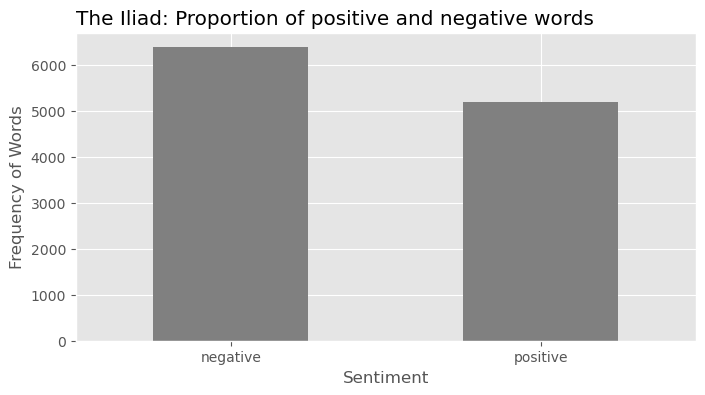

In [12]:
summary_df.n.plot.bar(legend=False, figsize=(8, 4), grid=True, color='gray')
plt.xlabel('Sentiment')
plt.ylabel('Frequency of Words')
plt.title('The Iliad: Proportion of positive and negative words', loc='left')
plt.xticks(rotation=0);

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.